In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
import math
import random
import scipy.stats

In [2]:
school = pd.read_csv('school-clean.csv')
school.head()
school.shape

(395, 12)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


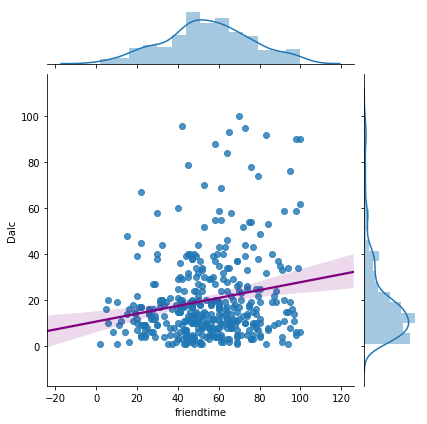

In [3]:
sb.jointplot('friendtime', 'Dalc', data = school, kind = 'reg', line_kws={'color': 'purple'})
plt.show()

C:\Users\GraceWang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\GraceWang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


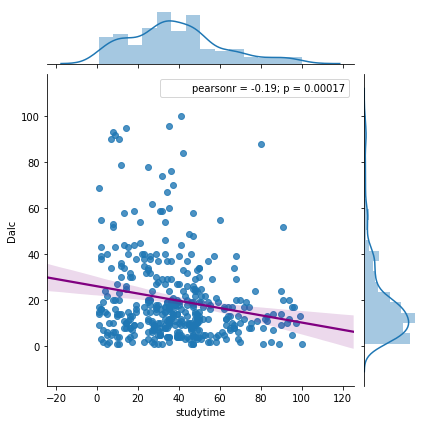

In [42]:
sb.jointplot('studytime', 'Dalc', data = school, kind = 'reg', line_kws={'color': 'purple'})
plt.show()

C:\Users\GraceWang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\GraceWang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


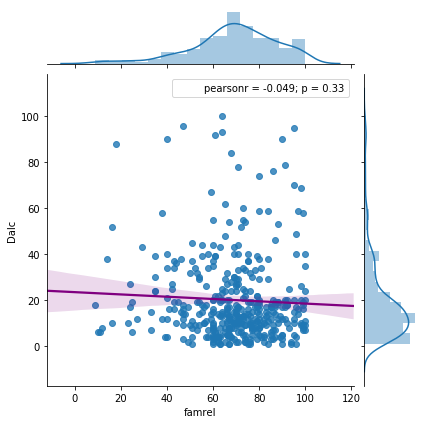

In [45]:
sb.jointplot('famrel', 'Dalc', data = school, kind = 'reg', line_kws={'color': 'purple'})
plt.show()

C:\Users\GraceWang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\GraceWang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


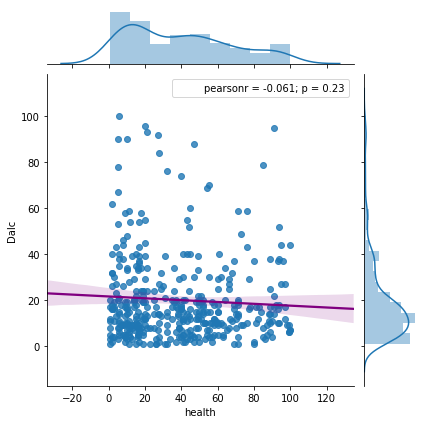

In [46]:
sb.jointplot('health', 'Dalc', data = school, kind = 'reg', line_kws={'color': 'purple'})
plt.show()

(array([90., 38., 29., 11.,  8.,  4.,  7.]),
 array([  1.        ,  15.14285714,  29.28571429,  43.42857143,
         57.57142857,  71.71428571,  85.85714286, 100.        ]),
 <a list of 7 Patch objects>)

(array([106.,  71.,  22.,   3.,   3.,   1.,   2.]),
 array([ 1.        , 13.71428571, 26.42857143, 39.14285714, 51.85714286,
        64.57142857, 77.28571429, 90.        ]),
 <a list of 7 Patch objects>)

Text(0.5,0,'Dalc')

Text(0,0.5,'Count')

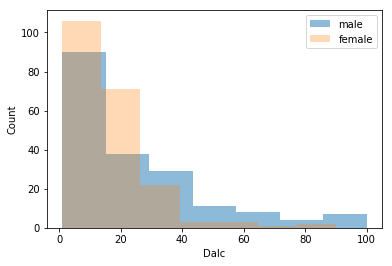

In [5]:
male = school.loc[school['sex']=='M', 'Dalc']
female = school.loc[school['sex']=='F', 'Dalc']
plt.hist(male, bins =7, alpha = .5)
plt.hist(female, bins = 7,  alpha = .3)
plt.legend(['male','female'])
plt.xlabel('Dalc')
plt.ylabel('Count')

In [43]:
def checkBaseline():
    newDF['sex'] = pd.Categorical(newDF['sex']).codes
    newDF['Pstatus'] = pd.Categorical(newDF['Pstatus']).codes
    newDF['activities'] = pd.Categorical(newDF['activities']).codes
    newDF['higher'] = pd.Categorical(newDF['higher']).codes
    newDF['internet'] = pd.Categorical(newDF['internet']).codes
      
    
    predictor = newDF.drop(['Dalc'], 1)
    targets = newDF['Dalc']
    
    model = sm.OLS(targets, sm.add_constant(predictor),missing='drop').fit()
    print (model.summary())

def histogramDalc():
     # Set up the matplotlib figure
    dalc = newDF.Dalc
    f, axes = plt.subplots(1, 2, figsize=(12, 6))

    plot1 = sb.distplot(dalc,kde = False,norm_hist=False,ax=axes[0]);
    plot1.set_title('Standard Histogram: Count',fontsize=12)

    plot2 = sb.distplot(dalc,kde = True,norm_hist=True,ax=axes[1]);
    plot2.set_title('Normal Histogram: Density',fontsize=12)
    
    f.savefig('Histogram Alcoholism.pdf')
    
def densityPlotGender():
    # Make one plot for each different location
    sb.kdeplot(newDF.loc[newDF['sex'] == 'F', 'Dalc'], 
                label = 'Female', shade = True)
    sb.kdeplot(newDF.loc[newDF['sex'] == 'M', 'Dalc'], 
                label = 'Male', shade = True)
    # Add labeling
    plt.xlabel('Alcoholism')
    plt.ylabel('Density')
    plt.title('Density Plot of Alcoholism by Gender')
    
    plt.savefig('Density Plot of Alcoholism by Gender.pdf')

    
def densityPlotAge():
    # Make one plot for each different location
    for age in range(15,19):
        sb.kdeplot(newDF.loc[newDF['age'] == age, 'Dalc'], label = str(age), shade = True)

    # Add labeling
    plt.xlabel('Alcoholism')
    plt.ylabel('Density')
    plt.title('Density Plot of Alcoholism by Age')
    
    plt.savefig('Density Plot of Alcoholism by Age.pdf')
    
def densityPlotParents():
    # Make one plot for each different location
    sb.kdeplot(newDF.loc[newDF['Pstatus'] == 'T', 'Dalc'], label = 'Together', shade = True)
    sb.kdeplot(newDF.loc[newDF['Pstatus'] == 'A', 'Dalc'], label = 'Seperated', shade = True)

    # Add labeling
    plt.xlabel('Alcoholism')
    plt.ylabel('Density')
    plt.title('Density Plot of Alcoholism by Parental Status')
    
    plt.savefig('Density Plot of Alcoholism by Parental Status.pdf')
    
def densityPlotActivities():
    # Make one plot for each different location
    sb.kdeplot(newDF.loc[newDF['activities'] == 'yes', 'Dalc'], label = 'Yes', shade = True)
    sb.kdeplot(newDF.loc[newDF['activities'] == 'no', 'Dalc'], label = 'No', shade = True)

    # Add labeling
    plt.xlabel('Alcoholism')
    plt.ylabel('Density')
    plt.title('Density Plot of Alcoholism by Extracurricular Activities')
    
    plt.savefig('Density Plot of Alcoholism by Extracurricular Activities.pdf')
    
def densityPlotInterne():
    # Make one plot for each different location
    sb.kdeplot(newDF.loc[newDF['internet'] == 'yes', 'Dalc'], label = 'Yes', shade = True)
    sb.kdeplot(newDF.loc[newDF['internet'] == 'no', 'Dalc'], label = 'No', shade = True)

    # Add labeling
    plt.xlabel('Alcoholism')
    plt.ylabel('Density')
    plt.title('Density Plot of Alcoholism by Internet Access')
    
    plt.savefig('Density Plot of Alcoholism by Internet Access.pdf')
    
    
def multiplePlots():
    
    list_ = ['famrel','friendtime','health', 'studytime']
    for variable in list_:
        tidyData = school
        g = sb.lmplot(x=variable, y='Dalc', hue='sex',col = 'Pstatus', row = 'activities',
                       truncate=True, size=5, aspect = 1, data=tidyData,fit_reg=True,scatter_kws={"s": 10})
         
        plt.savefig(variable + '_ScatterCatagories.pdf')


C:\Users\GraceWang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\GraceWang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


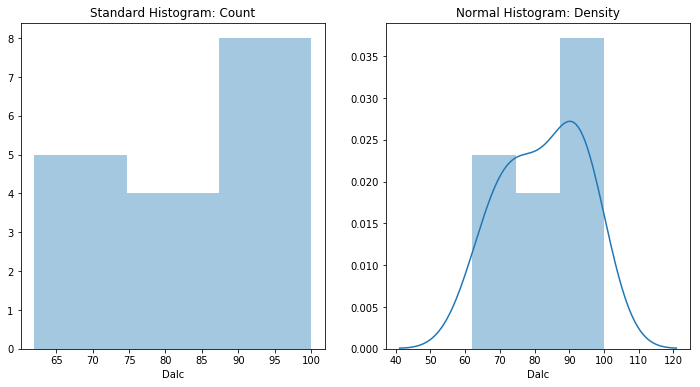

In [19]:
histogramDalc()

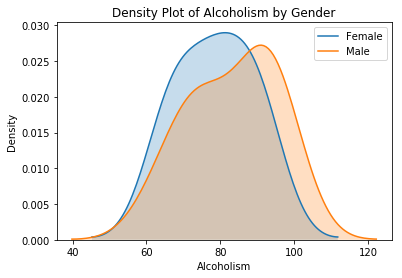

In [18]:
densityPlotGender()

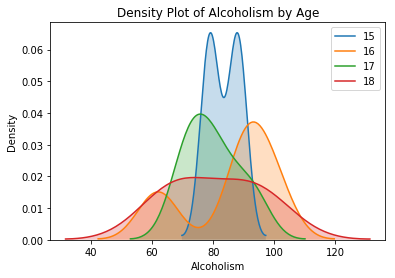

In [20]:
densityPlotAge()

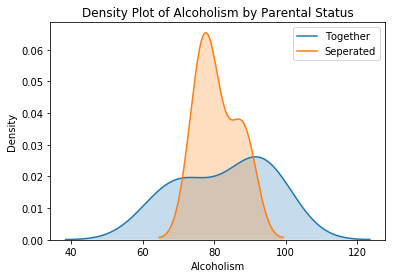

In [21]:
densityPlotParents()

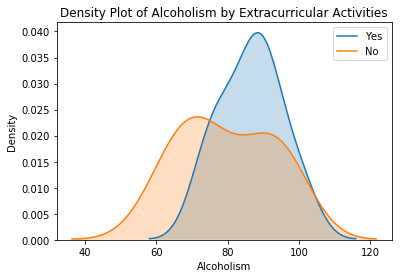

In [22]:
densityPlotActivities()

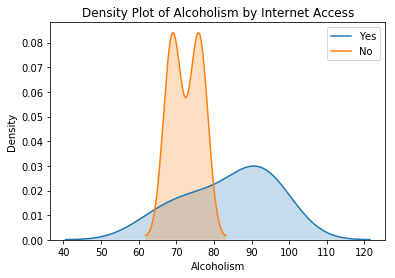

In [23]:
densityPlotInterne()

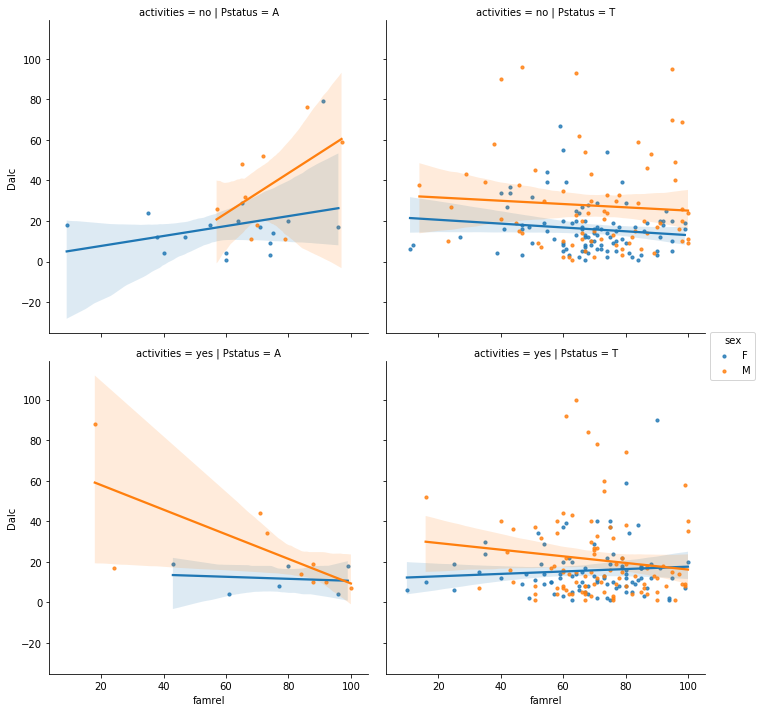

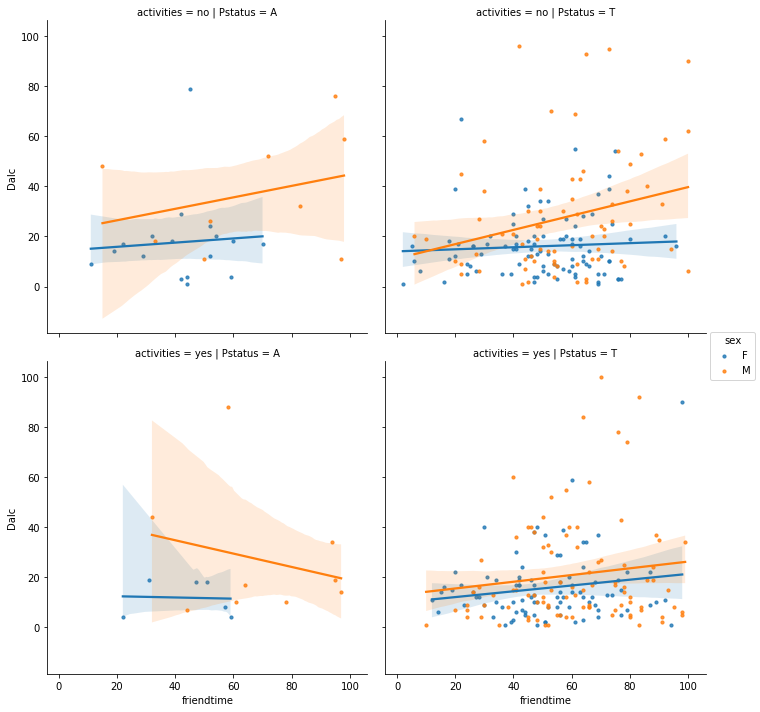

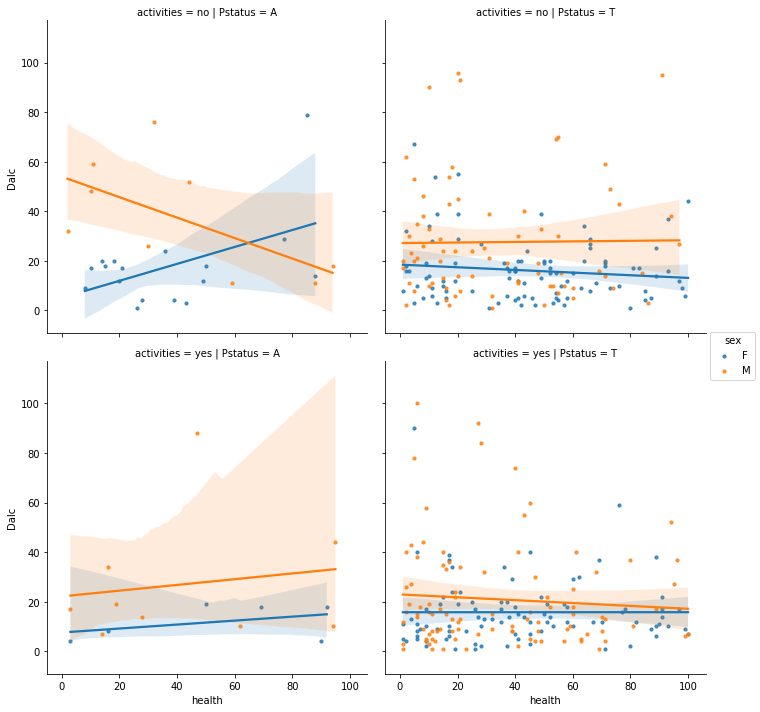

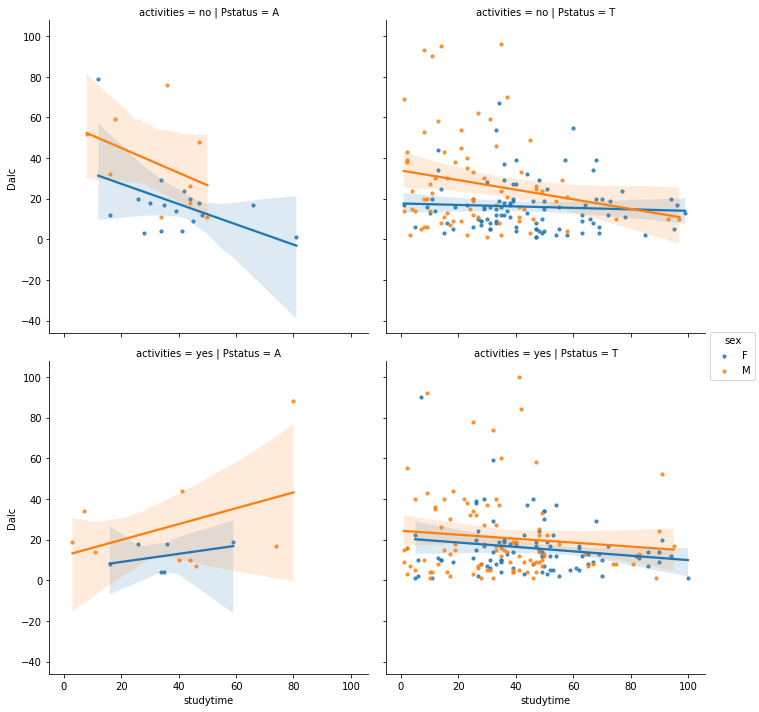

In [44]:
multiplePlots()

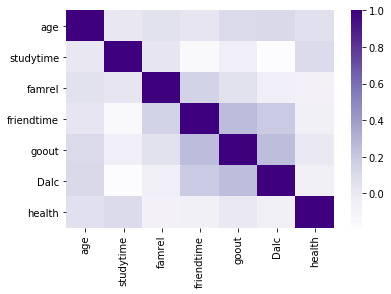

In [47]:
sb.heatmap(school.corr(), cmap = 'Purples')
plt.show()

In [48]:
school.corr()

,age,studytime,famrel,friendtime,goout,Dalc,health
age,1.000000,0.007212,0.049096,0.024025,0.110732,0.116393,0.066983
studytime,0.007212,1.000000,0.027841,-0.150755,-0.049550,-0.187782,0.102751
famrel,0.049096,0.027841,1.000000,0.141856,0.049140,-0.048768,-0.082895
friendtime,0.024025,-0.150755,0.141856,1.000000,0.258213,0.191648,-0.071264
goout,0.110732,-0.049550,0.049140,0.258213,1.000000,0.257284,0.002228
Dalc,0.116393,-0.187782,-0.048768,0.191648,0.257284,1.000000,-0.060786
health,0.066983,0.102751,-0.082895,-0.071264,0.002228,-0.060786,1.000000
